In [131]:
# import data 
import numpy as np
import pandas as df
np_folder = 'PRSA_preprocess/PRSA_Wanliu_numpy' #run this
np_split = np_folder.split('/')
np_file = np_split[1]
splitter = np_file.split('_')
display_name = splitter[0] + '_' + splitter[1]
hi = np.load('PRSA_preprocess/' + np_file + '.npy', allow_pickle=True)

dataframeee = df.DataFrame(hi)
dataframeee.columns = ['No', 'year', 'month','day', 'hour','PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']
# dataframeee.to_csv(display_name + '.csv', index=False) # comma separated

dataframeee.drop('No', axis=1, inplace=True)
dataframeee.drop('PM10', axis=1, inplace=True)
dataframeee.drop('SO2', axis=1, inplace=True)
dataframeee.drop('CO', axis=1, inplace=True)
dataframeee.drop('NO2', axis=1, inplace=True)
dataframeee.drop('O3', axis=1, inplace=True)

dataframeee.drop('station', axis=1, inplace=True)


In [132]:
dataframeee

,year,month,day,hour,PM2.5,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013,3,1,0,8.0,-0.7,1023.0,-18.8,0.0,337.5,4.4
1,2013,3,1,1,9.0,-1.1,1023.2,-18.2,0.0,0.0,4.7
2,2013,3,1,2,3.0,-1.1,1023.5,-18.2,0.0,337.5,5.6
3,2013,3,1,3,11.0,-1.4,1024.5,-19.4,0.0,315.0,3.1
4,2013,3,1,4,3.0,-2.0,1025.2,-19.5,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,11.0,12.6,1011.9,-14.3,0.0,0.0,2.0
35060,2017,2,28,20,15.0,9.4,1012.3,-11.9,0.0,247.5,1.0
35061,2017,2,28,21,13.0,8.7,1012.8,-13.7,0.0,0.0,1.1
35062,2017,2,28,22,12.0,7.8,1012.9,-12.6,0.0,22.5,1.0


In [133]:
# mark all NA values with 0
dataframeee['PM2.5'].fillna(0, inplace=True)
# drop the first 24 hours
#dataset = dataset[24:]
# summarize first 5 rows
# print(dataframeee.head(5))

dataset = dataframeee
print(dataset.head(5))

   year month day hour PM2.5 TEMP    PRES  DEWP RAIN     wd WSPM
0  2013     3   1    0   8.0 -0.7  1023.0 -18.8  0.0  337.5  4.4
1  2013     3   1    1   9.0 -1.1  1023.2 -18.2  0.0    0.0  4.7
2  2013     3   1    2   3.0 -1.1  1023.5 -18.2  0.0  337.5  5.6
3  2013     3   1    3  11.0 -1.4  1024.5 -19.4  0.0  315.0  3.1
4  2013     3   1    4   3.0 -2.0  1025.2 -19.5  0.0    0.0  2.0


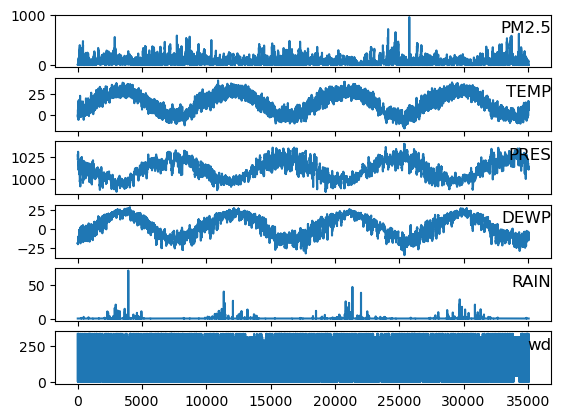

In [134]:
from matplotlib import pyplot

values = dataset.values
# specify columns to plot
groups = [4, 5, 6, 7, 8, 9]
i = 1
# plot each column
pyplot.figure()
for group in groups:
  pyplot.subplot(len(groups), 1, i)
  #print("i: " + str(i) + ", " + str(values[:,group]))
  pyplot.plot(values[:, group])
  pyplot.title(dataset.columns[group], y=0.5, loc='right')
  i += 1
pyplot.show()

In [135]:
# Multivariate LSTM Forecast Model
# Problem: predicting the pollution at the current hour (t) given the pollution measurement and weather conditions at the prior time step

# The wind direction feature is label encoded (integer encoded). This could further be one-hot encoded in the future if you are interested in exploring it
# Next, all features are normalized, then the dataset is transformed into a supervised learning problem. The weather variables for the hour to be predicted (t) are then removed.
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
 
	# input sequence (t-n, ... t-1)
	# n_in is the number of hours as input
	for i in range(n_in, 0, -1):

		# grab row of data and appent to col
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

	# forecast sequence (t, t+1, ... t+n)
	# n_out is the number of PM we want to predict
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	
		# drop columns we don't want to predict
		# drop next hour stats for meteorological keep PM data
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# drop columns we don't want to predict
# drop next hour stats for meteorological keep PM data
def resize(df):
  drop_list = []
  for i in range((input*7), (input+output)*7, 1):
      if (i%7 != 0):
        drop_list.append(i)
  print(drop_list)
  df.drop(reframed.columns[drop_list], axis=1, inplace=True)

In [136]:
# Preprocessing
# integer encode direction

encoder = LabelEncoder()
values[:,5] = encoder.fit_transform(values[:,5])

#print(values[:,5])
# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
print(scaled.shape)

(35064, 11)


In [137]:
# frame as supervised learning
input = 48
output = 24

# input how many hours to use as input
# output how many hours predict in future (only want PM)
reframed = series_to_supervised(scaled, input, output)
resize(reframed)
reframed.head()

[337, 338, 339, 340, 341, 342, 344, 345, 346, 347, 348, 349, 351, 352, 353, 354, 355, 356, 358, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 372, 373, 374, 375, 376, 377, 379, 380, 381, 382, 383, 384, 386, 387, 388, 389, 390, 391, 393, 394, 395, 396, 397, 398, 400, 401, 402, 403, 404, 405, 407, 408, 409, 410, 411, 412, 414, 415, 416, 417, 418, 419, 421, 422, 423, 424, 425, 426, 428, 429, 430, 431, 432, 433, 435, 436, 437, 438, 439, 440, 442, 443, 444, 445, 446, 447, 449, 450, 451, 452, 453, 454, 456, 457, 458, 459, 460, 461, 463, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 477, 478, 479, 480, 481, 482, 484, 485, 486, 487, 488, 489, 491, 492, 493, 494, 495, 496, 498, 499, 500, 501, 502, 503]


,var1(t-48),var2(t-48),var3(t-48),var4(t-48),var5(t-48),var6(t-48),var7(t-48),var8(t-48),var9(t-48),var10(t-48),...,var2(t+23),var3(t+23),var4(t+23),var5(t+23),var6(t+23),var7(t+23),var8(t+23),var9(t+23),var10(t+23),var11(t+23)
48,0.0,0.181818,0.0,0.000000,0.006283,0.317172,0.681984,0.253943,0.0,1.000000,...,0.181818,0.066667,1.000000,0.015707,0.480808,0.531250,0.383281,0.0,1.0,0.151786
49,0.0,0.181818,0.0,0.043478,0.007330,0.296970,0.685661,0.263407,0.0,0.000000,...,0.181818,0.100000,0.000000,0.017801,0.516162,0.547794,0.375394,0.0,0.0,0.232143
50,0.0,0.181818,0.0,0.086957,0.001047,0.296970,0.691175,0.263407,0.0,1.000000,...,0.181818,0.100000,0.043478,0.043979,0.526263,0.566175,0.365931,0.0,0.0,0.250000
51,0.0,0.181818,0.0,0.130435,0.009424,0.285859,0.709558,0.244479,0.0,0.933333,...,0.181818,0.100000,0.086957,0.041885,0.524242,0.566175,0.364353,0.0,0.0,0.383929
52,0.0,0.181818,0.0,0.173913,0.001047,0.253535,0.722425,0.242902,0.0,0.000000,...,0.181818,0.100000,0.130435,0.016754,0.509091,0.569853,0.367508,0.0,0.0,0.250000


In [138]:
# Define and Fit Model
# split into train and test sets
values = reframed.values
print(len(values))
features = 7
n_train_hours = 365 * 24 * 3
# train 75 % / test 25 %
train = values[:n_train_hours, :]

# rest is test data
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :input*features], train[:, input*features:]
test_X, test_y = test[:, :input*features], test[:, input*features:]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
# around 9k hours of training, 26k hours of testing

34993
(26280, 1, 336) (26280, 312) (8713, 1, 336) (8713, 312)


In [139]:
print(reframed.values.shape)

(34993, 648)


In [140]:
cnt = 0
for i in list(dataframeee):
    if cnt == 4:
        pm25 = dataframeee[i].tolist()
        break
    cnt += 1
print(len(pm25))


pm25_test = pm25[-8784:]
print(len(pm25_test))

35064
8784


In [141]:
preds = []


for i in range(0, 8731):
    prev48 = pm25_test[i:i+48]
    pred24 = []
    for j in range(6):
        prediction = sum(prev48[-48:]) / 48
        pred24.append(prediction)
        prev48.append(prediction)
    preds.append(pred24)

# print(pred24)
print(len(preds))
print(len(preds[0]))
# 8713 x 24

8731
6


In [142]:
import numpy as np
preds_np = np.array(preds)
print(preds_np.shape)

(8731, 6)


In [143]:
# np.save('baseline_no_ml.npy', preds_np)
np.save('baseline_6/' + display_name + "_np.npy", preds_np)